En esta sección se resumen varias formas de crear nuevas figuras de objetos gráficos con la biblioteca `plotly.py` de gráficos. La forma recomendada de crear figuras y completarlas es usar `Plotly Express`, pero esta página documenta varias otras opciones para completar.

# 2.2.1 `Plotly Express`

Plotly Express (incluido como `plotly.express`) es una API de visualización de datos de alto nivel que produce figuras de objetos gráficos completamente pobladas en llamadas de función únicas.

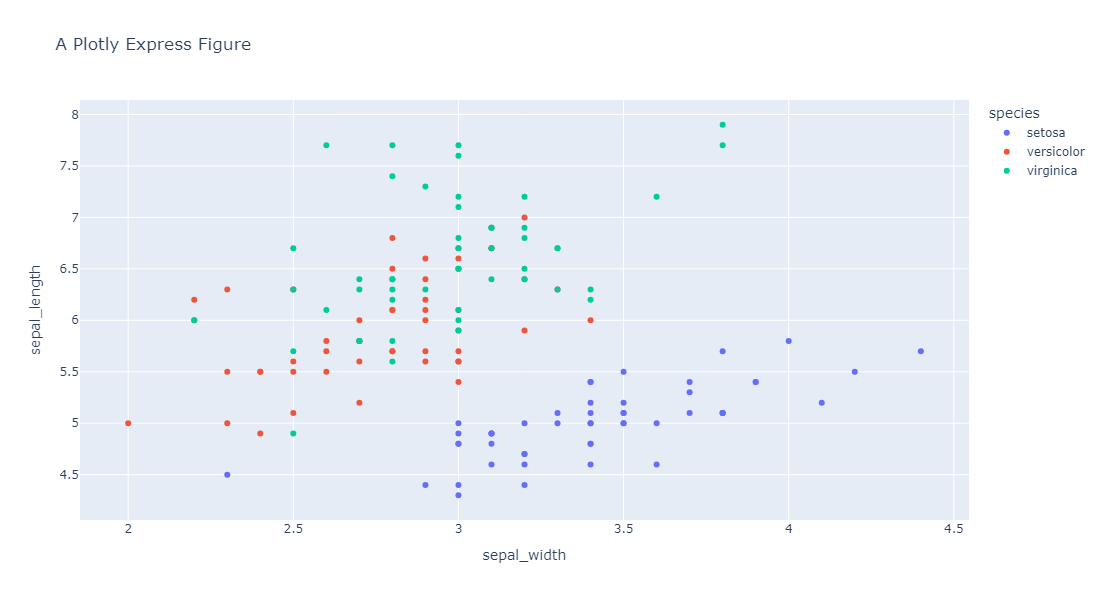

In [10]:
import plotly.express as px
from pandas import DataFrame
from plotly.graph_objects import Figure

df: DataFrame = px.data.iris()
fig: Figure = px.scatter(df, 
                         x="sepal_width", 
                         y="sepal_length", 
                         color="species", 
                         title="A Plotly Express Figure")

fig.update_layout(width=600, height=600) 
fig.show()

# 2.2.2 Constructor de figura `Graph Objects`

Como se demostró anteriormente, puede crear una figura completa al pasar especificaciones de trazado y diseño al constructor `plotly.graph_objects.Figure`. Estas especificaciones de trazado y diseño pueden ser diccionarios u objetos gráficos.

En el siguiente ejemplo, las trazas se especifican utilizando objetos gráficos y el diseño se especifica como un diccionario.

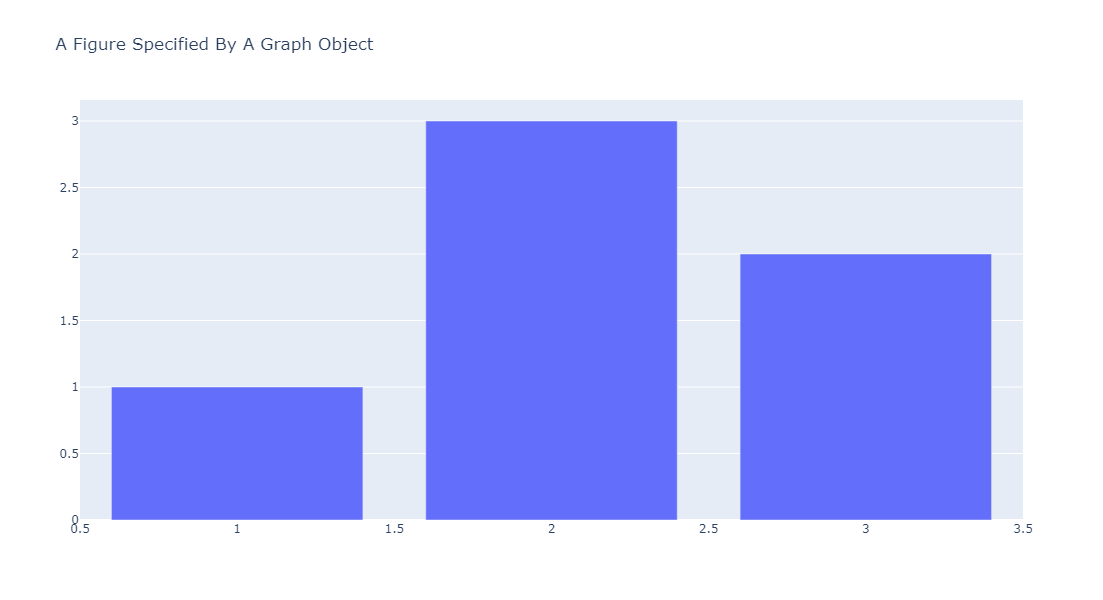

In [11]:
from plotly.graph_objects import Figure, Bar

fig: Figure = Figure(
    data=[Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=dict(title=dict(text="A Figure Specified By A Graph Object"))
)

fig.update_layout(width=600, height=600) 
fig.show()

# 2.2.3 `Figure Factories`

Las `Figure Factories` (incluidas en el módulo `plotly.pyel` en `plotly.figure_factory`) son funciones que producen figuras de objetos gráficos, a menudo para satisfacer las necesidades de dominios especializados. 

A continuación, se muestra un ejemplo de uso de `create_quiver()` para construir una figura de objeto gráfico que muestra un gráfico de Quiver en 2D.

In [7]:
import numpy as np
import plotly.figure_factory as ff
from numpy import ndarray
from plotly.graph_objects import Figure

x1: ndarray
y1: ndarray
x1, y1 = np.meshgrid(np.arange(0, 2, .2), np.arange(0, 2, .2))

u1: ndarray = np.cos(x1) * y1
v1: ndarray = np.sin(x1) * y1

fig: Figure = ff.create_quiver(x1, y1, u1, v1)

fig.update_layout(width=600, height=600) 
fig.show()

# 2.2.4 Crear Subplots

La función `plotly.subplots.make_subplots()` produce una figura de objeto gráfico que está preconfigurada con una cuadrícula de subgráficos a los que se pueden agregar trazas. La función `add_trace()` se analizará con más detalle a continuación.

In [8]:
from plotly.subplots import make_subplots
from plotly.graph_objects import Scatter, Bar, Figure

fig: Figure = make_subplots(rows = 1, cols = 2)

fig.add_trace(Scatter(y=[4, 2, 1], mode="lines"), 
              row=1, 
              col=1)

fig.add_trace(Bar(y=[2, 1, 3]), 
              row=1, 
              col=2)

fig.update_layout(width=600, height=600) 
fig.show()

# 2.2.5 Actualizando Figuras

Podemos tener una __Figura__ inicialmente vacía pero podemos actualizar su contenido después.

In [9]:
from plotly.graph_objects import Figure, Bar


fig = Figure()

fig.add_trace(Bar(x=[1, 2, 3], 
                  y=[1, 3, 2]))

fig.show()